<a href="https://www.kaggle.com/code/isabbaggin/housing-price-prediction?scriptVersionId=147580812" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path='/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv'

In [3]:
model_data=pd.read_csv(data_path)

In [4]:
model_data.isnull().sum() #check if there are any missing values---------->here none

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [5]:
model_data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [6]:
model_data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

<Axes: xlabel='City'>

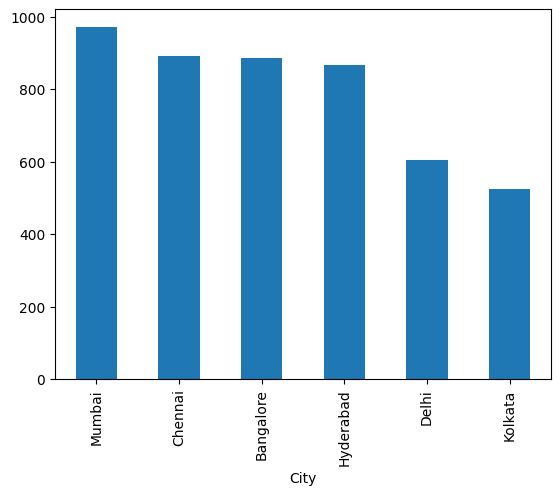

In [7]:
model_data['City'].value_counts().plot(kind='bar',y='Rent')

In [8]:
features=['BHK','Size','City','Furnishing Status','Bathroom'] #ADD Area Type, Floor and Area Locality if similar

In [9]:
from sklearn.preprocessing import LabelEncoder #using label encoder to map to same values everytime


In [10]:
#model_data['Area Type']=model_data['Area Type'].replace(['Super Area','Carpet Area'],[1,0])
model_data['Furnishing Status']=model_data['Furnishing Status'].replace(['Furnished','Semi-Furnished','Unfurnished'],[2,1,0])
#model_data['Area Type']=pd.to_numeric(model_data['Area Type'],errors='coerce')
model_data['Furnishing Status']=pd.to_numeric(model_data['Furnishing Status'],errors='coerce')

In [11]:
#left_categorical_columns=['Floor','Area Locality']  #convert dtype=object to dtype=category for using category codes to convert object to number
#model_data['Floor']=model_data['Floor'].astype('category')
#all_categories1=model_data['Floor'].unique()
#encoder1=LabelEncoder()
#encoder1.fit(all_categories1)
#model_data['Floor']=encoder1.transform(model_data['Floor'])
    #X[categorical_columns]=X[categorical_columns].apply(lambda x:x.cat.codes)
    
model_data['City']=model_data['City'].astype('category')
all_categories2=model_data['City'].unique()
encoder2=LabelEncoder()
encoder2.fit(all_categories2)
model_data['City']=encoder2.transform(model_data['City'])
model_data['City'].dtype

dtype('int64')

In [12]:
model_data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [13]:
#model_data=model_data.dropna(axis=0)
#model_data.isnull().sum()

In [14]:
X=model_data[features]
y=model_data.Rent  

In [15]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y=train_test_split(X,y,train_size=0.8,random_state=1)  #split train and test data
train_X

,BHK,Size,City,Furnishing Status,Bathroom
2233,2,700,0,1,1
1080,3,1233,5,1,4
4717,3,1600,3,1,3
2273,1,600,0,0,1
2889,1,70,2,1,1
...,...,...,...,...,...
2895,1,450,2,0,1
2763,1,545,2,2,1
905,3,806,5,1,2
3980,2,1600,3,0,3


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [17]:
#def score(n_estimator):
#    model=RandomForestRegressor(max_leaf_nodes=10000,n_estimators=n_estimator,criterion='absolute_error',random_state=1)
#    model.fit(train_X,train_y)
#    val_predict=model.predict(val_X)
#    return mean_absolute_error(val_y,val_predict)
#for i in np.arange(240,245,1):
#    mae=score(i)
#    print(mae)  #241 n estimator gives lowest mae score
    

In [18]:
def get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y):
    m_data=RandomForestRegressor(max_leaf_nodes=max_leaf_nodes,n_estimators=241,criterion='absolute_error',random_state=1)
    m_data.fit(train_X,train_y)
    val_predictions=m_data.predict(val_X)
    mae=mean_absolute_error(val_y,val_predictions)
    return(mae)

In [19]:

#best_leaf=0
#best_mae=500000
#nodes=np.arange(200,250,10)
#for max_leaf in nodes:
#    possible_mae=get_mae(max_leaf,train_X,val_X,train_y,val_y)
#    if(possible_mae<best_mae):
#        best_leaf=max_leaf
#        best_mae=possible_mae
#best_no_of_leaves=best_leaf
#print(best_no_of_leaves)

In [20]:
#print(best_no_of_leaves) #10002 (10000) (200 with 241 n estimators)
#print(best_mae)

In [21]:
#using n-estimators instead of max_no_of_leaves gave better results. 

In [22]:
train_to_rf=RandomForestRegressor(n_estimators=200,random_state=1)
train_to_rf.fit(X,y)
#find accuracy with mean absolute error
val_predicted_from_rf=train_to_rf.predict(val_X)
improved_mae=mean_absolute_error(val_predicted_from_rf,val_y)
improved_mae

8403.384270628396

In [23]:
print(train_to_rf.score(val_X,val_y))

0.8783268552985186


In [24]:
print(val_y)

230     18000
4500    10500
3277    16000
4045    13000
1561     9500
        ...  
943     22000
2101     8500
2579    45000
2249    11000
495     12000
Name: Rent, Length: 950, dtype: int64


In [25]:
#print(val_predicted_from_rf)

In [26]:
def predict_rent(bhk,size,city,furnishing_status,bath): #area type, add floor, area locality
    x=np.zeros(len(X.columns))
    x[0]=bhk
    x[1]=size
    #x[2]=int(floor)
    #x[2]=area_type
    x[2]=city
    x[3]=furnishing_status
    x[4]=bath
    return(train_to_rf.predict([x]))

In [27]:
data=[['1 out of 3','Carpet Area','Kolkata','Unfurnished']]
df=pd.DataFrame(data,columns=['Floor','Area Type','City','Furnishing Status'],dtype='category')
#df['Floor']=encoder1.transform(df['Floor'])
df['City']=encoder2.transform(df['City'])
df['Area Type']=df['Area Type'].replace(['Super Area','Carpet Area'],[1,0])
df['Furnishing Status']=df['Furnishing Status'].replace(['Furnished','Semi-Furnished','Unfurnished'],[2,1,0])
predict_rent(3,1000,df['City'],df['Furnishing Status'],1)

/tmp/ipykernel_20/1188350175.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x[2]=city
/tmp/ipykernel_20/1188350175.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x[3]=furnishing_status
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([21779.65386003])